Write Python code that completes the following. Use code snippet below to begin faster.
1. Draw 50 2d points from distribution 1:
    - (a) x1 = Draw 50 x coordinates from N(1,1) (normal distribution with mean 0 and variance 1).
    - (b) y1 = Draw 50 y coordinates from N(0,1).
2. Draw 50 2d points from distribution 2:
    - (a) x2 = Draw 50 x coordinates from N(-1,1).
    - (b) y2 = Draw 50 y coordinates from N(0,1).
3. Draw the two sets of 2d points on the 2d plane. We will draw on the first of the subplots, and keep
the second subplot for later, just leave it empty in the meanwhile.

In [13]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
# matplotlib
plt.figure(figsize = (8,8))


In [206]:
x1 = np.random.normal(loc = 1, scale = 1, size = 200)
y1 = np.random.normal(loc = 0, scale = 1, size = 200)

In [207]:
x2 = np.random.normal(loc = -1, scale = 1, size = 50)
y2 = np.random.normal(loc = 0, scale = 1, size = 50)

In [208]:
y2

array([-0.04210071,  1.15636952,  1.20067932,  0.66039791, -0.82132549,
        0.99890387,  1.10983406,  1.77133237, -0.46720162,  0.80686621,
       -1.52089736,  0.54871016,  1.26759885,  1.86499444,  0.0747946 ,
       -0.51656976,  0.99271133,  0.58863516, -1.31946842, -0.63600673,
        1.0384168 , -0.12309295, -0.36430154, -0.46508911,  1.84079829,
        0.65914395, -1.30363126,  1.89970663,  1.13993396, -0.66594178,
        0.15066954, -0.5406483 , -0.3392054 , -0.88982836,  1.13157435,
        0.27920848, -0.34057792,  2.64570603, -1.22177259,  0.7140258 ,
        0.74660396,  0.18400217, -1.28238069,  0.53951453,  0.34263329,
       -0.84423179,  0.92364586,  1.62140428, -0.39883683, -0.49878404])

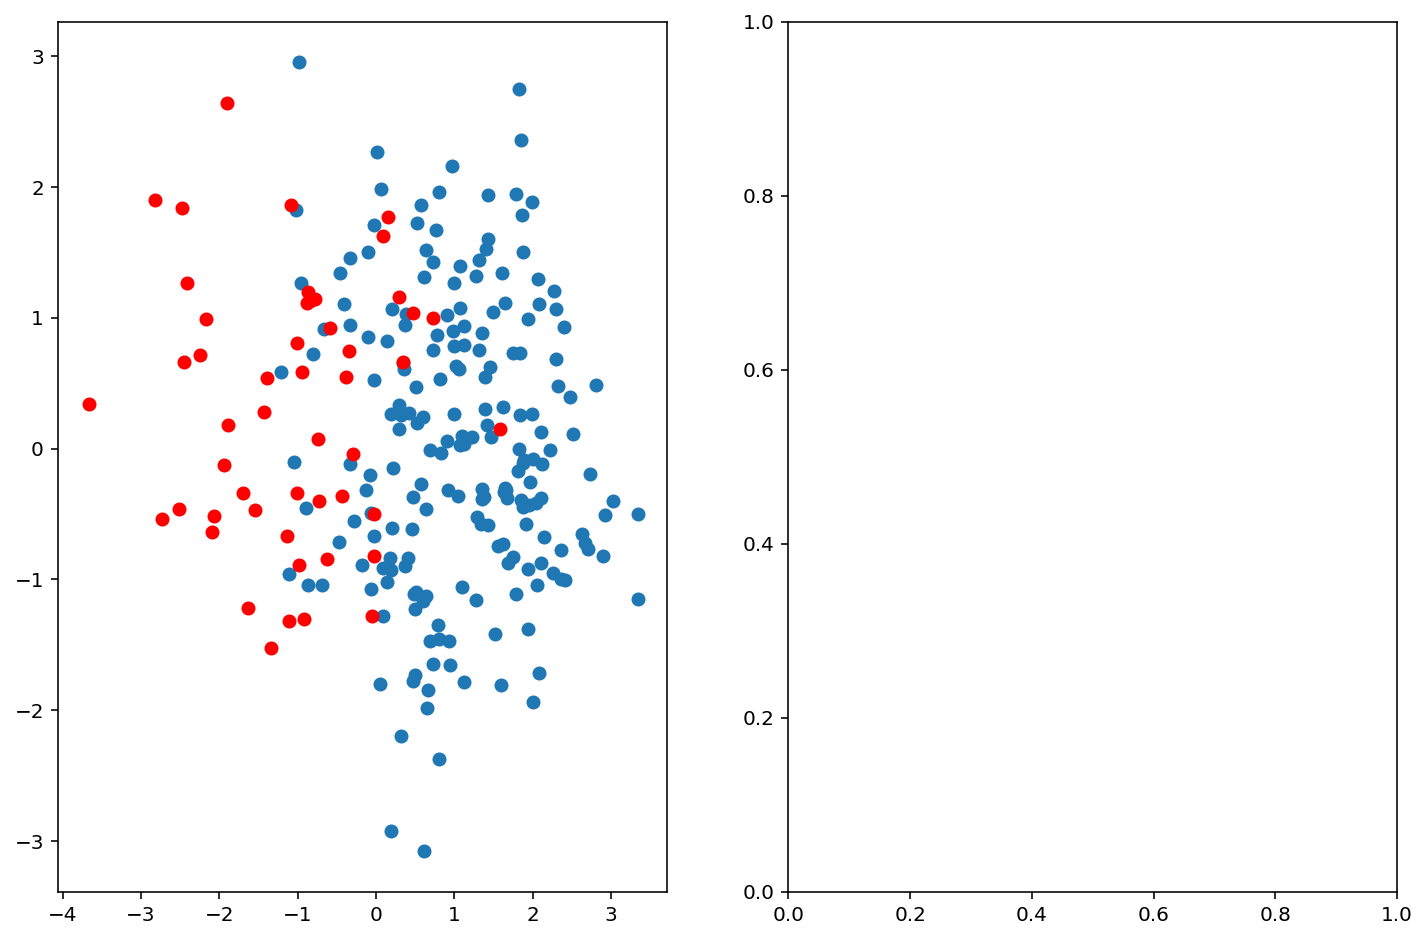

In [209]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))
ax = axes.flatten()

ax[0].scatter(x1, y1)
ax[0].scatter(x2, y2, color = "red")   #, "red")#ax[0].scatter(x2,y2)

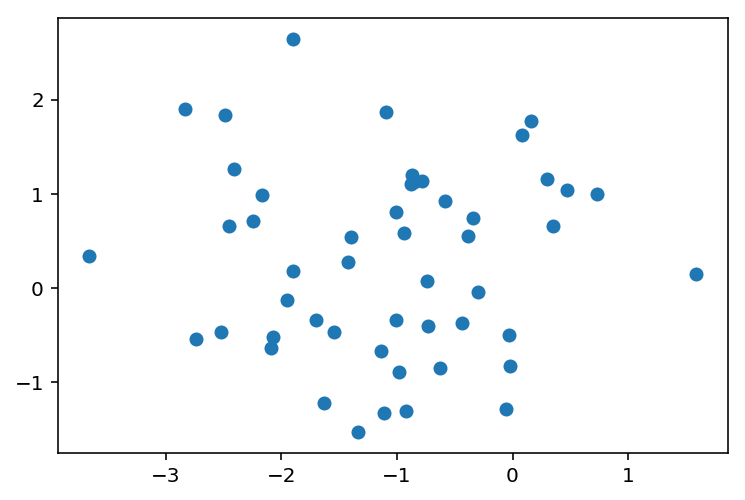

In [210]:
plt.scatter(x2, y2)

Next, implement the following function:
def my_kmeans2d(x,y,k):
Input:
1. x - a vector of input points’ x coordinates.
2. y - a vector of input points’ y coordinates.
1
3. k - the amount of clusters.

# k-means clustering

1
2


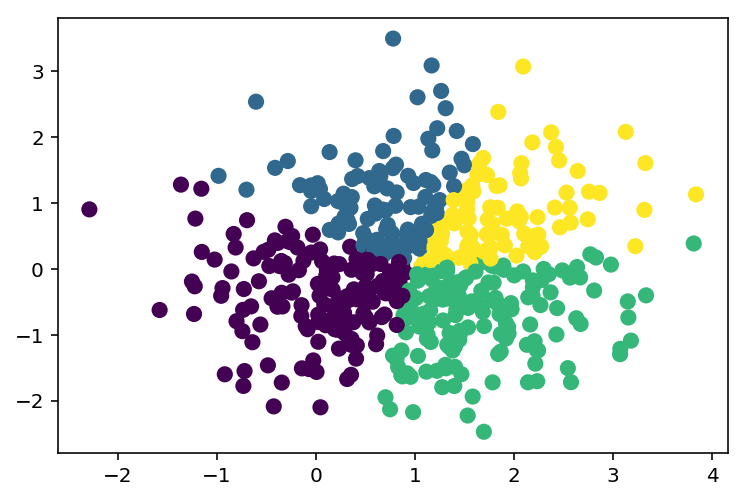

In [376]:
# normal clustering

x1 = np.random.normal(loc = 1, scale = 1, size = 500)
y1 = np.random.normal(loc = 0, scale = 1, size = 500)

def euclids_distance(pt, clusters_centroid):
    euclid = np.sum(((pt - clusters_centroid) ** 2).values, axis = 1)**1/2
    closest_center = np.argmin(euclid)
    return closest_center
def my_kmeans2d(x,y,k):
    #random.choice()
    clusters = (np.arange(1,k+1))
    
    #initialize clusters
    initial_clusters = np.asarray([ np.asarray([x_ind,y_ind, np.random.choice(clusters)]) for (x_ind,y_ind) in zip(x,y)])
    old_clusters = np.zeros((len(initial_clusters),3))
    ct = 0
    new_clusters = old_clusters+1
   # for i in range(5):

    while np.array_equal(new_clusters, old_clusters) is False:
        
        old_clusters = new_clusters # make old clusters the ones from before 
        
        clusters_centroid_df = pd.DataFrame(initial_clusters, columns=["x","y","k_ind"]).groupby("k_ind").mean().reset_index()
        closest_centroids = [euclids_distance((x_ind, y_ind), clusters_centroid_df[["x","y"]]) for (x_ind,y_ind) in zip(x,y)]
        new_clusters = [np.asarray([x_ind, y_ind, cluster]) for (x_ind, y_ind, cluster) in zip(x,y, closest_centroids)]
        
        ct = ct + 1
        print(ct)
        
    final_clusters = np.asarray(new_clusters)
    plt.scatter(final_clusters[:,0], final_clusters[:,1], c=final_clusters[:,2], s=50)

  
my_kmeans2d(x1,y1,4)

In [374]:
# heiarchical clustering

x1 = np.random.normal(loc = 1, scale = 1, size = 10)
y1 = np.random.normal(loc = 0, scale = 1, size = 10)

def euclids_distance(pt, clusters_centroid):
    label = pt[2]
    pt = pt[0:2]
    clusters_centroid = clusters_centroid[:,0:2]
    euclid = np.sum(((pt - clusters_centroid) ** 2), axis = 1)**1/2
    return [(euclid_indiv, label) for euclid_indiv in euclid if euclid_indiv != 0]

def exponential_kernel(x1, x2):
    # Broadcasting tricks to get every pairwise distance.
    distances = [euclids_distance(x, x1) for x in x1]
    print(distances[0])
    print(distances[1])

   # return np.exp(-((x1[np.newaxis, :, :] - x2[:, np.newaxis, :]) ** 2).sum(2)).T

a = np.random.randn(100, 5)


def my_heiarchical_cluster(x,y):
    #random.choice()
    initial_clusters = np.asarray([[pt[0],pt[1], ix] for ix, pt in enumerate(zip(x,y))])
    
    return exponential_kernel(initial_clusters, initial_clusters)
    #np.exp(-((x1[initial, :, :] - x2[:, np.newaxis, :]) ** 2).sum(2)).T
    
my_heiarchical_cluster(x1,y1)

[(0.76369828774943394, 0.0), (0.91277626133034617, 0.0), (3.0874991171777837, 0.0), (2.4401577633354785, 0.0), (0.94228001333480293, 0.0), (0.16708610744481783, 0.0), (2.2201914476500959, 0.0), (0.8265997941262655, 0.0), (3.5685796195108148, 0.0)]
[(0.76369828774943394, 1.0), (0.10613115540677301, 1.0), (1.570928316806371, 1.0), (1.3615954144189915, 1.0), (0.9594327686761126, 1.0), (1.4189494471463528, 1.0), (0.38127757488491931, 1.0), (1.7031287455992521, 1.0), (1.3781589110949066, 1.0)]
